           X     y
0  50961.865   1.1
1  50961.865   1.1
2  50961.865   1.1
3  50961.865  20.0
4  50961.865  20.0
Mean Squared Error: 176741463.13487276
R^2 Score: 0.01817394740795908


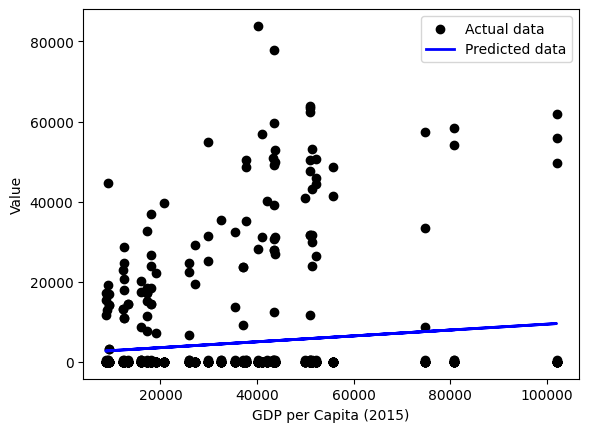

In [1]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import pandas as pd

# Load the datasets
gdp_per_capita = pd.read_csv("gdp_per_capita.csv", thousands=",", delimiter="\t",
                             encoding="latin1", na_values="n/a")
oecd_bli = pd.read_csv('oecd_bli_2015.csv')


# Assuming 'Country' is the common key in both DataFrames
gdp_per_capita.rename(columns={'Country': 'Country Name'}, inplace=True)  # Rename if needed

# Merge the DataFrames on the common key
merged_data = pd.merge(gdp_per_capita, oecd_bli, left_on='Country Name', right_on='Country', how='inner')

# Extract the relevant columns
X = merged_data['2015']
y = merged_data['Value']

# Convert to DataFrame for easy handling
data = pd.DataFrame({'X': X, 'y': y})

# Print the first few rows to check the new DataFrame
print(data.head())

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[['X']], data['y'], test_size=0.2, random_state=0)

# Create a linear regression model
model = linear_model.LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Plot the results
import matplotlib.pyplot as plt
plt.scatter(X_test, y_test, color='black', label='Actual data')
plt.plot(X_test, y_pred, color='blue', linewidth=2, label='Predicted data')
plt.xlabel('GDP per Capita (2015)')
plt.ylabel('Value')
plt.legend()
plt.show()
